# Optimisation: CMA-ES

This example shows you how to run a global optimisation with [CMA-ES](http://pints.readthedocs.io/en/latest/optimisers/cmaes.html).

For a more elaborate example of an optimisation, see: [basic optimisation example](./first-example.ipynb).

Minimising error measure
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time m:s
0     6      1421875   1421875    0:00.0
1     12     1421875   1574156    0:00.0
2     18     1421875   2300549    0:00.0
3     24     1292165   1292165    0:00.1
20    126    1230030   1230030    0:00.1
40    246    1207764   1207764    0:00.1
60    366    519051.2  519051.2   0:00.2
80    486    99089.79  99307.36   0:00.3
100   606    99069.84  99069.84   0:00.3
120   726    99069.84  99069.84   0:00.3
140   846    99069.84  99069.84   0:00.4
160   966    99069.84  99069.84   0:00.4
180   1086   99069.84  99069.84   0:00.5
200   1206   99069.84  99069.84   0:00.5
220   1326   99069.84  99069.84   0:00.6
240   1446   99069.84  99069.84   0:00.6
260   1566   99069.84  99069.84   0:00.7
280   1686   99069.84  99069.84   0:00.7
300   1806   99069.84  99069.84   0:00.8
320   1926   99069.84  99069.84   0:00.8
340 

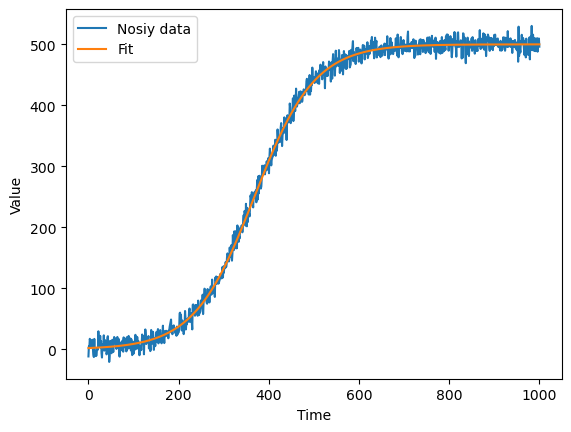

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.01, 450
sigma0 = [0.01, 100]
opt = pints.OptimisationController(
    score,
    x0,
    sigma0,
    boundaries,
    method=pints.CMAES
)
found_parameters, found_value = opt.run()

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
plt.figure()
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(times, values, label='Nosiy data')
plt.plot(times, problem.evaluate(found_parameters), label='Fit')
plt.legend()
plt.show()